<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°06


**Objetivo**: Aplicar técnicas básicas de **Machine Learning**, desde la preparación de datos hasta el entrenamiento y evaluación de modelos.




<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png" width="500"/>
</p>

El **cuarteto de Anscombe** es un ejemplo clásico en estadística que ilustra cómo diferentes conjuntos de datos pueden compartir las mismas propiedades estadísticas, como media, varianza y correlación, pero presentan comportamientos muy distintos cuando se visualizan gráficamente. Cada uno de los cuatro conjuntos consiste en once puntos (x, y) y fue creado por el estadístico F. J. Anscombe en 1973. Esta herramienta resalta la importancia de la visualización de datos para evitar interpretaciones erróneas basadas únicamente en análisis numéricos.

**Descripción del conjunto**

1. **Propiedades estadísticas comunes:** Todos los conjuntos tienen el mismo valor promedio para las variables \(x\) e \(y\), la misma varianza para \(x\) e \(y\), y una correlación lineal idéntica.
2. **Diferencias gráficas:** A pesar de sus similitudes estadísticas, los cuatro conjuntos presentan gráficos muy distintos:
   - El primer conjunto muestra una relación lineal simple.
   - El segundo conjunto tiene una relación no lineal, con una curva clara.
   - El tercer conjunto tiene una relación lineal clara, pero con un punto atípico que influye significativamente.
   - El cuarto conjunto tiene la mayoría de los puntos alineados verticalmente, con un punto atípico que afecta la correlación.

Este cuarteto enfatiza que las estadísticas descriptivas por sí solas pueden no capturar la esencia completa de los datos, subrayando la necesidad de utilizar visualizaciones en cualquier análisis exploratorio de datos.

In [1]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configuración de los gráficos
%matplotlib inline
sns.set_theme(style="whitegrid")  # Establece un tema general para los gráficos
sns.set_palette("deep", desat=0.6)
plt.rcParams['figure.figsize'] = (12, 8)  # Ajuste del tamaño de las figuras

# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")

# Mostrar las primeras filas del conjunto de datos
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Con base en la información presentada y el análisis realizado, les invitamos a reflexionar y responder las siguientes preguntas. Estas preguntas están diseñadas para profundizar en su comprensión del cuarteto de Anscombe y fomentar un análisis crítico de los datos:



1. Cree un gráfico de dispersión (scatter plot) para cada uno de los cuatro grupos del cuarteto de Anscombe. A partir de la visualización, ¿puede identificar diferencias significativas entre los grupos? ¿Qué características particulares observa en cada uno que sugieren comportamientos distintos?



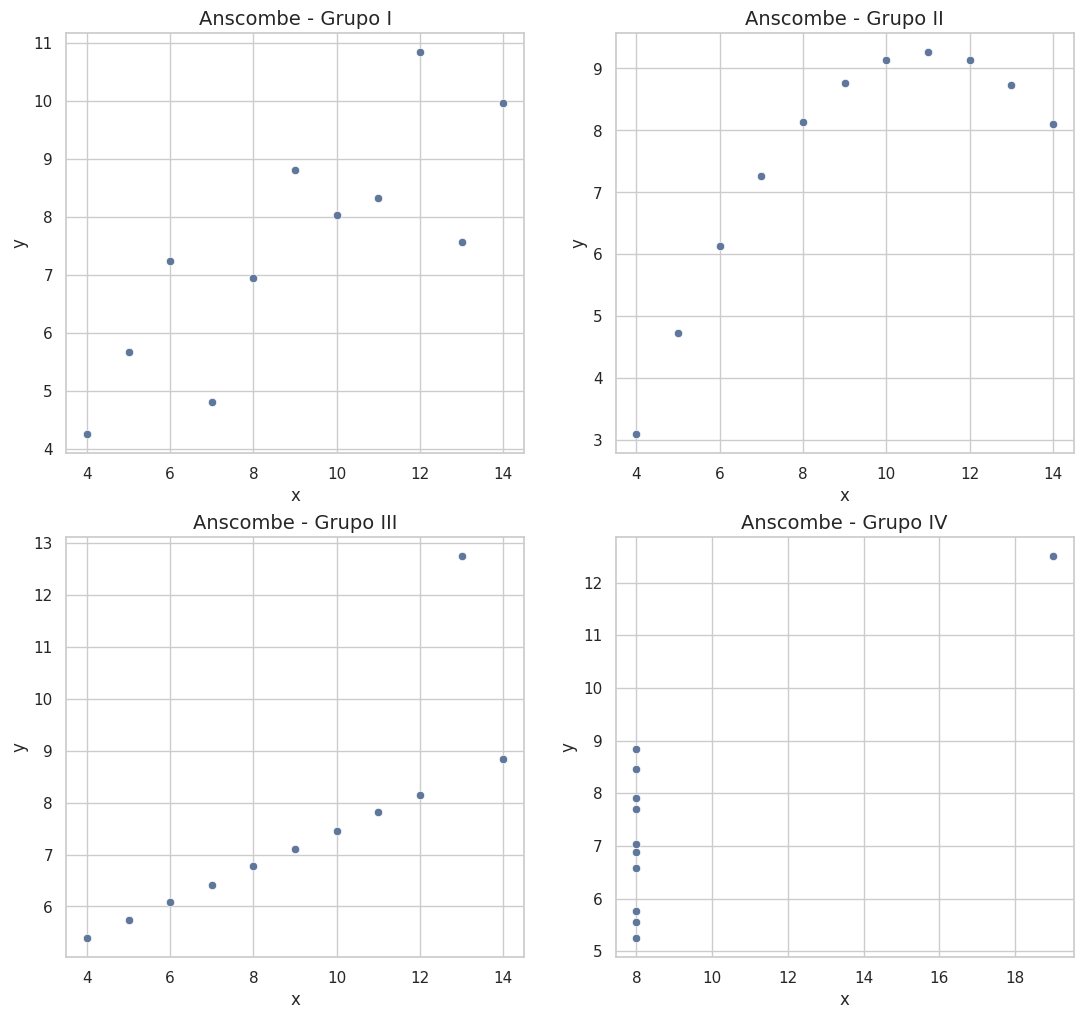

In [15]:
fig, axes=plt.subplots(2,2,figsize=(13,12))
grupos=data['dataset'].unique()

for i, grupo in enumerate(grupos):
    ax = axes[i//2,i%2]
    subset = data[data['dataset'] == grupo]
    sns.scatterplot(x="x", y="y", data=subset, ax=ax)

    ax.set_title(f"Anscombe - Grupo {grupo}", fontsize=14)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
plt.show()

Claramente hay diferencias visuales, en el grupo $1$ los puntos estan dispersos, en el grupo $2$ tienden a formar una curva, en el grupo $3$ forman una recta con un punto excluido y en el grupo $4$ es otra recta con un punto excluido.

2. Utilice el comando `describe` para generar un resumen de las medidas estadísticas más relevantes para cada uno de los grupos del cuarteto de Anscombe. A partir de estos resultados, interprete las estadísticas obtenidas, destacando las características más significativas de cada grupo y cómo pueden influir en la comprensión de sus respectivas distribuciones.


In [16]:
#Utilice el comando describe para generar un resumen de las medidas estadísticas más relevantes para cada uno de los grupos del cuarteto de Anscombe
data.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

En el grupo 1,2 y 3, el eje x tiene todos sus estadisticas iguales excepto en el grupo 4 que tiene sus cuantiles iguales a $8$ excepto uno que es $19$, con esto podemos decir que el grupo 4 cambia bastante con respecto a los demas.

Para todos los grupos en el eje y se tiene que sus valores maximos y minimos son todos distintos, bastante parecidos pero distintos, explicando que pueden haber valores fuera de lo comun, como outliers.

3. Ajuste un modelo de regresión lineal para cada grupo utilizando **sklearn**. Calcule las métricas de evaluación, como el error cuadrático medio (MSE) y R², y grafique los resultados de la regresión. Interprete los resultados y su impacto en la calidad del ajuste.



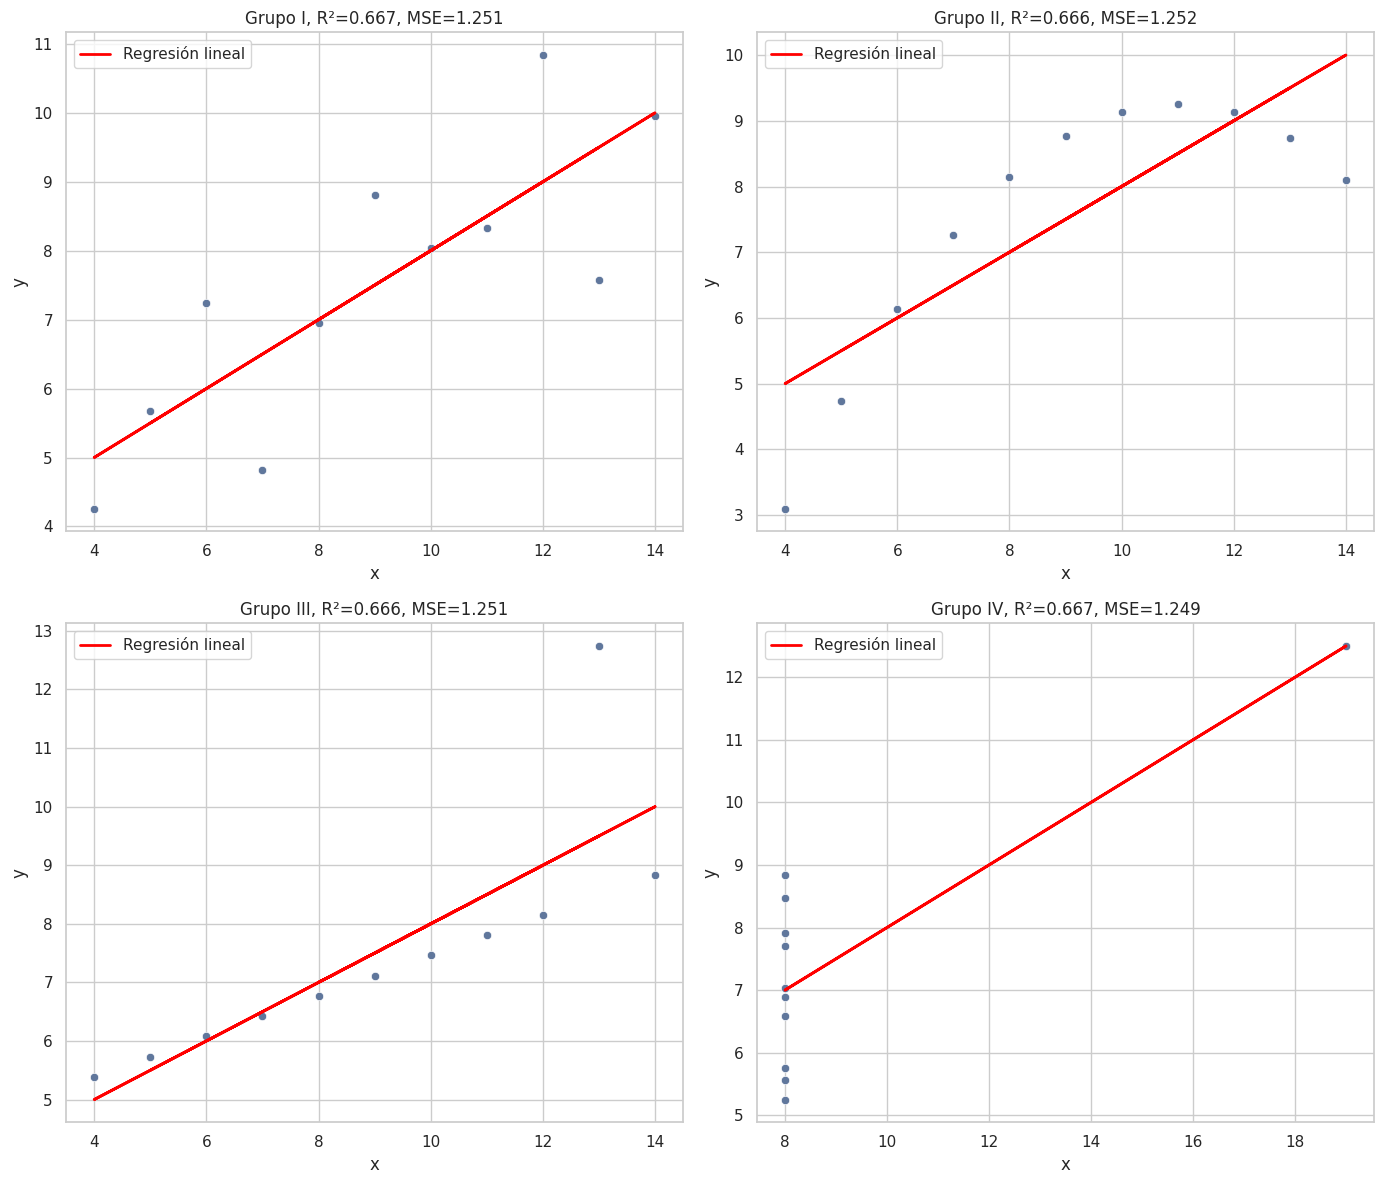

,Grupo,Pendiente,Intercepto,MSE,R²
0,I,0.500091,3.000091,1.251154,0.666542
1,II,0.500000,3.000909,1.252390,0.666242
2,III,0.499727,3.002455,1.250563,0.666324
3,IV,0.499909,3.001727,1.249317,0.666707


In [29]:
lista=[]
fig, axes= plt.subplots(2, 2, figsize=(14, 12))
grupos= data['dataset'].unique()
for i, grupo in enumerate(grupos):
    ax= axes[i // 2, i % 2]
    subset= data[data['dataset'] == grupo]
    x=subset[['x']]
    y=subset['y']
    grafico=LinearRegression()
    grafico.fit(x,y)
    y2= grafico.predict(x)
    mse= mean_squared_error(y,y2)
    r2= r2_score(y,y2)
    lista.append({
        "Grupo": grupo,
        "Pendiente": grafico.coef_[0],
        "Intercepto": grafico.intercept_,
        "MSE": mse,
        "R²": r2
    })
    sns.scatterplot(x="x", y="y", data=subset, ax=ax)
    ax.plot(x, y2, color="red", linewidth=2, label="Regresión lineal")
    ax.set_title(f"Grupo {grupo}, R²={r2:.3f}, MSE={mse:.3f}")
    ax.legend()
plt.tight_layout()
plt.show()
pd.DataFrame(lista)

Es facil ver, dada la tabla que sus valores de pendiente, intercepto, MSE y R² son muy parecidos, pero al ver los graficos hay puntos en especifico que empeoran el ajuste lineal de todos los puntos, como los outliers, en el grafico 1 esto no pasa, se tiene un buen grafico, para el grafico 2 el ajuste no sigue la tendencia de la curva, en el grupo 3 hay un unico punto outlier que arruina el ajuste lineal lo mismo para el grupo 4, en este grafico el ajuste es pesimo.

4. Es evidente que el ajuste lineal no es adecuado para algunos grupos. Existen diversas estrategias para abordar este problema, como eliminar outliers o emplear diferentes modelos de regresión. Identifique una estrategia que podría mejorar el ajuste del modelo de regresión lineal y, si lo considera necesario, implemente otros modelos alternativos para aquellos casos donde el ajuste lineal resulte inadecuado.

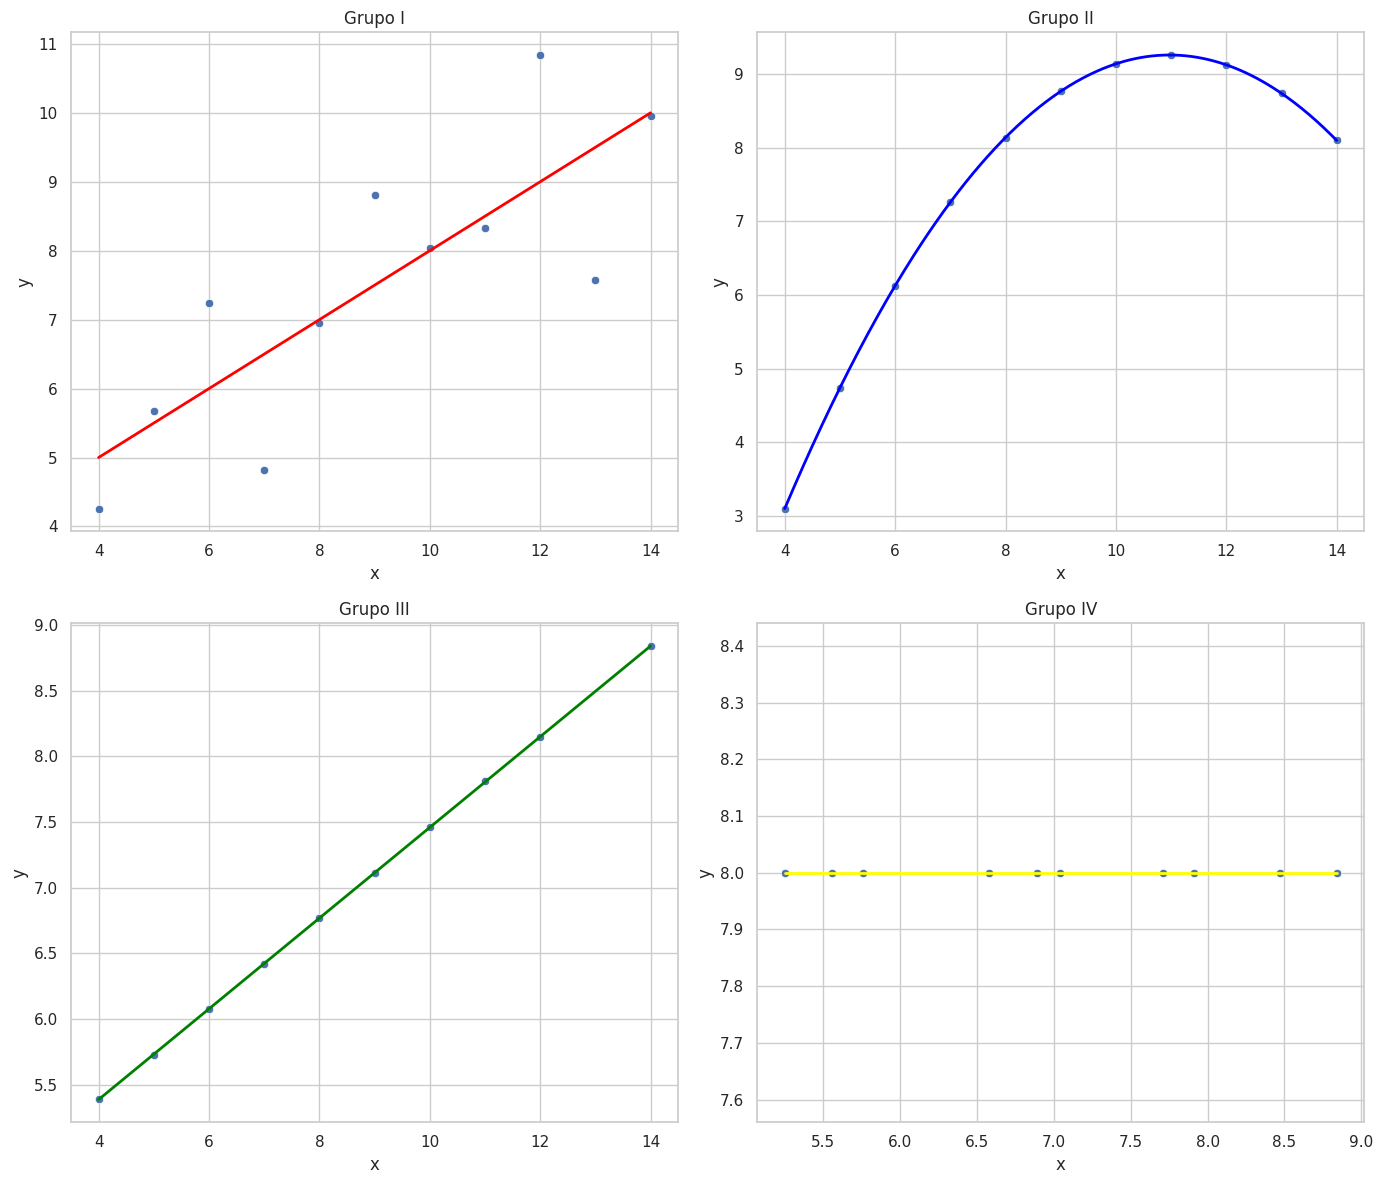

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

plt.rcParams['figure.figsize'] = (14, 12)
data= sns.load_dataset("anscombe")
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
grupos= ['I', 'II', 'III', 'IV']

for i, grupo in enumerate(grupos):
    ax= axes[i // 2, i % 2]
    subset = data[data['dataset'] == grupo].copy()

    if grupo == "I":
        x= subset[['x']].values
        y= subset['y'].values
        model= LinearRegression().fit(x, y)
        y_pred= model.predict(x)
        x_plot= np.linspace(x.min(), x.max(), 200).reshape(-1,1)
        y_plot= model.predict(x_plot)

        sns.scatterplot(x=subset['x'], y=subset['y'], ax=ax)
        ax.plot(x_plot.ravel(), y_plot, color='red', linewidth=2)
        ax.set_title("Grupo I")

    elif grupo== "II":
        x= subset[['x']].values
        y= subset['y'].values
        poly= PolynomialFeatures(degree=2, include_bias=True)
        x_poly= poly.fit_transform(x)
        modelo= LinearRegression().fit(x_poly, y)
        y_pred= modelo.predict(x_poly)

        x_plot= np.linspace(x.min(), x.max(), 300).reshape(-1,1)
        y_plot= modelo.predict(poly.transform(x_plot))

        sns.scatterplot(x=subset['x'], y=subset['y'], ax=ax)
        ax.plot(x_plot.ravel(), y_plot, color='blue', linewidth=2)
        ax.set_title("Grupo II")

    elif grupo== "III":
        out_idx= subset['y'].idxmax()
        out_point= subset.loc[out_idx]
        subset_no_out= subset.drop(out_idx)

        x= subset_no_out[['x']].values
        y= subset_no_out['y'].values
        model= LinearRegression().fit(x, y)
        y_pred= model.predict(x)

        x_plot= np.linspace(x.min(), x.max(), 200).reshape(-1,1)
        y_plot= model.predict(x_plot)

        sns.scatterplot(x=subset_no_out['x'], y=subset_no_out['y'], ax=ax)
        ax.plot(x_plot.ravel(), y_plot, color='green', linewidth=2)
        ax.set_title("Grupo III")

    elif grupo== "IV":
        swapped= subset[['y', 'x']].copy()
        swapped.columns= ['x', 'y']
        out_idx= swapped['x'].idxmax()
        out_point= swapped.loc[out_idx]
        swapped_no_out= swapped.drop(out_idx)

        x= swapped_no_out[['x']].values
        y= swapped_no_out['y'].values
        model= LinearRegression().fit(x, y)
        y_pred= model.predict(x)

        x_plot= np.linspace(x.min(), x.max(), 200).reshape(-1,1)
        y_plot= model.predict(x_plot)

        sns.scatterplot(x=swapped_no_out['x'], y=swapped_no_out['y'], ax=ax)
        ax.plot(x_plot.ravel(), y_plot, color='yellow', linewidth=2)
        ax.set_title("Grupo IV")
        ax.set_xlabel("x")
        ax.set_ylabel("y")
plt.tight_layout()
plt.show()

Para el grafico 1, se mantuvo igual, el grafico 2 se ajusto bajo polinomios de grado 2 con una curva suave, en el grafico 3 se encuentra el outlier con el valor de y maximo y se elimina, en el grafico 4 se invierten los ejes para encontrar el valor de x maximo que es el outlier luego de invertir los ejes y eliminarlo.